In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Only a fraction of the total number of orders end up being completed. Let's call this fraction (Completed orders / Total number of orders) 'Orders Conversion Rate'. Can you plot the weekly evolution of the 'Orders Conversion Rate'? Find the best chart to represent it. 

HINT: Trends throughout time are best represented by lines. Search how to do line plots with Seaborn.

In [7]:
orders = pd.read_csv("orders_cl.csv")

In [8]:
o = orders
o

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [9]:
o['created_date'] = pd.to_datetime(o['created_date'])

In [11]:
o = o.assign(calendar_week = o['created_date'].dt.strftime('%W'))
o.sort_values('calendar_week')

,order_id,created_date,total_paid,state,calendar_week
671,300044,2017-01-01 22:13:08,0.00,Place Order,00
491,299852,2017-01-01 18:30:05,4467.95,Shopping Basket,00
492,299853,2017-01-01 18:30:20,77.89,Shopping Basket,00
493,299854,2017-01-01 18:31:29,0.00,Place Order,00
494,299855,2017-01-01 18:32:35,28.49,Shopping Basket,00
...,...,...,...,...,...
173002,473380,2017-12-27 13:41:13,387.13,Place Order,52
173001,473379,2017-12-27 13:40:33,186.99,Shopping Basket,52
173000,473378,2017-12-27 13:40:31,1229.89,Shopping Basket,52
172998,473376,2017-12-27 14:05:24,25.68,Completed,52


In [12]:
o= o.assign(year = o['created_date'].dt.strftime('%Y'))
o

,order_id,created_date,total_paid,state,calendar_week,year
0,241319,2017-01-02 13:35:40,44.99,Cancelled,01,2017
1,241423,2017-11-06 13:10:02,136.15,Completed,45,2017
2,242832,2017-12-31 17:40:03,15.76,Completed,52,2017
3,243330,2017-02-16 10:59:38,84.98,Completed,07,2017
4,243784,2017-11-24 13:35:19,157.86,Cancelled,47,2017
...,...,...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order,11,2018
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket,11,2018
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket,11,2018
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket,11,2018


In [13]:
o_2017 =o[o['year'] == '2017']


In [14]:
o_2017.groupby('calendar_week').state.count()

calendar_week
00      548
01     5019
02     4791
03     3414
04     3508
05     3294
06     2941
07     3228
08     2970
09     2935
10     2100
11     2422
12     2566
13     2644
14     2739
15     1751
16     2457
17     2368
18     2165
19     2160
20     2007
21     2146
22     2315
23     2306
24     2331
25     1999
26     2705
27     3383
28     3269
29     2809
30     3065
31     2655
32     2422
33     1787
34     2153
35     2904
36     2474
37     2511
38     3035
39     2927
40     3187
41     2598
42     3144
43     3482
44     2851
45     3802
46     2577
47    17322
48     8084
49     4601
50     5809
51     5696
52     7318
Name: state, dtype: int64

In [15]:
o_state =o.groupby(['state','calendar_week']).order_id.count()
o_completed =o_state.reset_index().iloc[53:106]
o_completed['Orders Conversion Rate'] = (o_completed['order_id']/226904)*100 

In [16]:
o_completed['Orders Conversion Rate'] = o_completed['Orders Conversion Rate']*100

In [17]:
o_completed['Orders Conversion Rate']=((o_completed['order_id']/226904)*100).round(decimals=2)

In [18]:
o_completed.head()

,state,calendar_week,order_id,Orders Conversion Rate
53,Completed,00,114,0.05
54,Completed,01,2646,1.17
55,Completed,02,2529,1.11
56,Completed,03,1905,0.84
57,Completed,04,1956,0.86


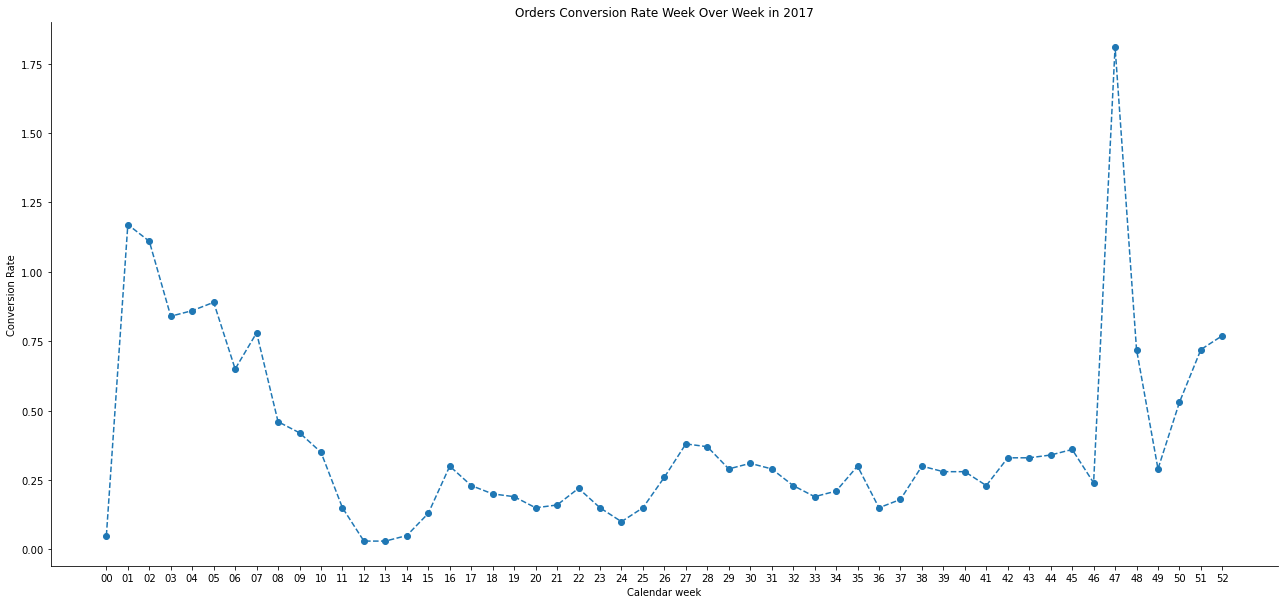

In [19]:
plt.subplots(figsize=(22, 10))
plt.plot_date(data=o_completed, x='calendar_week', y='Orders Conversion Rate', linestyle='--')

plt.title('Orders Conversion Rate Week Over Week in 2017')
plt.xlabel('Calendar week')
plt.ylabel('Conversion Rate')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()
plt.show()

If you combine the unit prices from the products dataframe with the unit price in orderlines, you can find if a discount has been applied into a product and how much is the difference. Find out which are the best visualisation to:

Show the evolution of the average discount (in %) by each month

In [20]:
p = pd.read_csv("products_cl.csv")
ol = pd.read_csv("orderlines_cl.csv")

In [21]:
p.columns

Index(['sku', 'name', 'desc', 'price', 'promo_price', 'in_stock'], dtype='object')

In [22]:
ol.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date'],
      dtype='object')

In [23]:
ol['date'] = pd.to_datetime(ol['date'])
ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 15.7+ MB


In [179]:
p_ol= ol.merge(p, how='left',left_on='unit_price', right_on='price')
p_ol

,id,id_order,product_id,product_quantity,sku_x,unit_price,date,sku_y,name,desc,price,promo_price,in_stock
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,14.65,0.0
1,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,NTE0027,NewerTech Mini DVI to DVI Adapter,Adapter mini DVI to DVI.,18.99,10.99,0.0
2,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,NTE0028,NewerTech Mini DVI to VGA Adapter,Mini DVI to VGA.,18.99,12.99,1.0
3,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,DLK0075,D-Link GO-SW-8E Switch 8 Ethernet ports,D-Link Switch 8 Ethernet ports maximum speed.,18.99,10.99,0.0
4,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,LEX0020,Lexar Premium SDHC UHS Class 1 | 32GB,SDHC Memory Card 32GB UHS Class 1 with speeds ...,18.99,14.28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102329,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36,SAN0111,SanDisk Ultra Flair Flash Drive 32GB USB 3.0,USB 3.0 flash drive 32GB USB Flash Drive Mac a...,13.99,15.00,1.0
10102330,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36,MUV0173,Muvit Crystal iPhone Case Bump SE / 5S / 5 Tra...,Protective Case for iPhone two colors 5 / 5S / SE,13.99,11.99,0.0
10102331,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36,SAN0146,Pendrive 16GB SanDisk Ultra Dual USB-C / USB,16GB flash drive with two different USB-C and ...,13.99,15.00,1.0
10102332,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36,PUR0148,"Pure Nude Ultraslim 03 ""iPhone Case 8 Plus / 7...",transparent and flexible cover with 03mm thick...,13.99,13.99,1.0


In [27]:
p_ol =p_ol.assign(year = p_ol['date'].dt.strftime('%Y'))

In [28]:
p_ol =p_ol.assign(month = p_ol['date'].dt.strftime('%b'))

In [29]:
p_ol.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku_x',
       'unit_price', 'date', 'sku_y', 'name', 'desc', 'price', 'promo_price',
       'in_stock', 'year', 'month'],
      dtype='object')

In [30]:
p_ol=p_ol[p_ol['year'] == '2017']

In [31]:
p_ol[['price','promo_price','month']]

,price,promo_price,month
0,18.99,14.65,Jan
1,18.99,10.99,Jan
2,18.99,12.99,Jan
3,18.99,10.99,Jan
4,18.99,14.28,Jan
...,...,...,...
7840078,16.99,15.99,Dec
7840079,16.99,6.99,Dec
7840080,16.99,7.99,Dec
7840081,16.99,12.01,Dec


Only products

In [32]:
p_ol['c_1'] =  (p_ol['promo_price']*100)/p_ol['price']

In [33]:
p_ol['c_1'] = 100-(p_ol['c_1'])
p_ol['c_1'].round(decimals=0)

0          23.0
1          42.0
2          32.0
3          42.0
4          25.0
           ... 
7840078     6.0
7840079    59.0
7840080    53.0
7840081    29.0
7840082    35.0
Name: c_1, Length: 7840083, dtype: float64

In [34]:
p_ol['Discount'] = p_ol['c_1'].round(decimals=0)

In [35]:
p_ol[['month','Discount']]

,month,Discount
0,Jan,23.0
1,Jan,42.0
2,Jan,32.0
3,Jan,42.0
4,Jan,25.0
...,...,...
7840078,Dec,6.0
7840079,Dec,59.0
7840080,Dec,53.0
7840081,Dec,29.0


In [36]:
p_ol_discount_month = p_ol.groupby('month').Discount.mean().round(decimals=0).reset_index()
p_ol_discount_month

,month,Discount
0,Apr,25.0
1,Aug,25.0
2,Dec,24.0
3,Feb,25.0
4,Jan,25.0
5,Jul,25.0
6,Jun,25.0
7,Mar,25.0
8,May,26.0
9,Nov,24.0


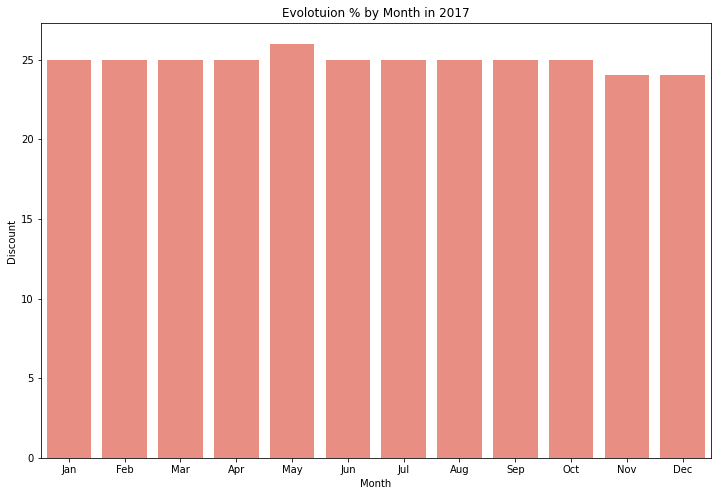

In [40]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplots(figsize=(12, 8))

sns.barplot(data=p_ol_discount_month, x='month', y='Discount', order=month, color='Salmon')
plt.xlabel('Month')
plt.ylabel('Discount')
plt.title('Evolotuion % by Month in 2017') 
plt.ticklabel_format(style='plain', axis='y')
plt.show() 

Show the top 30 products with the highest discounts in absolute values, on average.

In [185]:
p_ol_30 = p_ol[['name','price','promo_price']]
p_ol_30

,name,price,promo_price
0,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,18.99,14.65
1,NewerTech Mini DVI to DVI Adapter,18.99,10.99
2,NewerTech Mini DVI to VGA Adapter,18.99,12.99
3,D-Link GO-SW-8E Switch 8 Ethernet ports,18.99,10.99
4,Lexar Premium SDHC UHS Class 1 | 32GB,18.99,14.28
...,...,...,...
10102329,SanDisk Ultra Flair Flash Drive 32GB USB 3.0,13.99,15.00
10102330,Muvit Crystal iPhone Case Bump SE / 5S / 5 Tra...,13.99,11.99
10102331,Pendrive 16GB SanDisk Ultra Dual USB-C / USB,13.99,15.00
10102332,"Pure Nude Ultraslim 03 ""iPhone Case 8 Plus / 7...",13.99,13.99


In [186]:
p_ol_30['c_1'] =  (p_ol_30['promo_price']*100)/p_ol_30['price']

<ipython-input-186-dc8c0a99bf74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ol_30['c_1'] =  (p_ol_30['promo_price']*100)/p_ol_30['price']


In [187]:
p_ol_30['c_1'] = 100-(p_ol_30['c_1'])


<ipython-input-187-768478c4785d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ol_30['c_1'] = 100-(p_ol_30['c_1'])


In [188]:
p_ol_30['c_1'].round(decimals=0)

0           23.0
1           42.0
2           32.0
3           42.0
4           25.0
            ... 
10102329    -7.0
10102330    14.0
10102331    -7.0
10102332     0.0
10102333    34.0
Name: c_1, Length: 10102334, dtype: float64

In [189]:
p_ol_30['discount'] = p_ol_30['c_1']

<ipython-input-189-0b7e6cfd451b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ol_30['discount'] = p_ol_30['c_1']


In [193]:
p_ol_30=p_ol_30.drop(['c_1'], axis=1)

In [194]:
p_ol_30.duplicated().sum()

10094634

In [196]:
p_ol_30 =p_ol_30.drop_duplicates()

In [200]:
p_ol_30= p_ol_30.sort_values(by='discount',ascending=False).head(30).round(decimals=0)
p_ol_30

,name,price,promo_price,discount
3206,Brenthaven Fusion case for MacBook Pro Retina ...,100.0,2.0,98.0
25259,(Open) Jawbone UP2 Activity Monitor Black,120.0,2.0,98.0
424,(Open) NewerTech Cable HDMI to HDMI 1.4A 180m,18.0,0.0,98.0
5811,Open - OtterBox Symmetry Case iPhone 6 / 6S Bl...,50.0,1.0,98.0
1553,Open - NewerTech Mini DisplayPort to DVI Adapter,30.0,1.0,97.0
8057,Open - (OEM) EarPods Headphones with Remote an...,35.0,1.0,97.0
1620,Open - Griffin Survivor iPhone Case Wallet Cle...,30.0,1.0,96.0
307532,Like new - Apple iPhone 6S 16GB Silver,749.0,33.0,96.0
896,Open - Satechi Hub 3 USB ports + Ethernet Alum...,40.0,2.0,96.0
4476,Cleaning Spray pencil-astuce 6ml,10.0,0.0,96.0


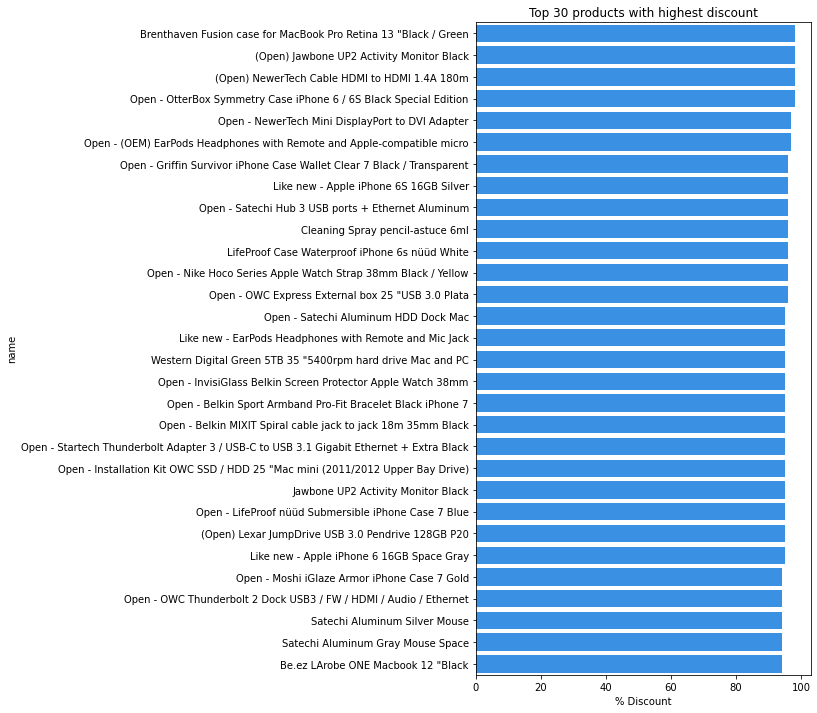

In [203]:
plt.subplots(figsize=(6, 12))
sns.barplot(data=p_ol_30, x='discount', y='name', color='dodgerblue')
plt.title('Top 30 products with highest discount')
plt.xlabel('% Discount')
plt.show()

Show the distributions of discounts for each brand. Choose the discount measure you consider better to compare all brands. HINT: you can use the first 3 characters of the sku name to merge it with the brands table.

In [49]:
p_ol.drop(['id_order','product_quantity', 'c_1','in_stock'], axis= 1)

,id,product_id,sku_x,unit_price,date,sku_y,name,desc,price,promo_price,year,month,Discount
0,1119109,0,OTT0133,18.99,2017-01-01 00:07:19,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,14.65,2017,Jan,23.0
1,1119109,0,OTT0133,18.99,2017-01-01 00:07:19,NTE0027,NewerTech Mini DVI to DVI Adapter,Adapter mini DVI to DVI.,18.99,10.99,2017,Jan,42.0
2,1119109,0,OTT0133,18.99,2017-01-01 00:07:19,NTE0028,NewerTech Mini DVI to VGA Adapter,Mini DVI to VGA.,18.99,12.99,2017,Jan,32.0
3,1119109,0,OTT0133,18.99,2017-01-01 00:07:19,DLK0075,D-Link GO-SW-8E Switch 8 Ethernet ports,D-Link Switch 8 Ethernet ports maximum speed.,18.99,10.99,2017,Jan,42.0
4,1119109,0,OTT0133,18.99,2017-01-01 00:07:19,LEX0020,Lexar Premium SDHC UHS Class 1 | 32GB,SDHC Memory Card 32GB UHS Class 1 with speeds ...,18.99,14.28,2017,Jan,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840078,1529551,0,OTT0175,16.99,2017-12-31 23:53:23,WOE0012,Wowewa Protector Tempered Glass iPhone 6s Plus...,3D tempered glass protector: covers all edges ...,16.99,15.99,2017,Dec,6.0
7840079,1529551,0,OTT0175,16.99,2017-12-31 23:53:23,GRT0428,Griffin Reveal iPhone Case 8/7 Transparent,thin polycarbonate case with transparent back ...,16.99,6.99,2017,Dec,59.0
7840080,1529551,0,OTT0175,16.99,2017-12-31 23:53:23,AII0052-A,(Open) Aiino Custodia Elegance iPhone 6 Blue,Smart Cover for iPhone 6,16.99,7.99,2017,Dec,53.0
7840081,1529551,0,OTT0175,16.99,2017-12-31 23:53:23,WOE0006-A,Open - Wowewa Protector Tempered Glass iPhone ...,3D tempered glass protector: covers all edges ...,16.99,12.01,2017,Dec,29.0


In [42]:
import pandas as pd

brands = pd.read_csv("brands_cl.csv")
b=brands
print(b)

    short       long
0     8MO  8Mobility
1     ACM       Acme
2     ADN     Adonit
3     AII      Aiino
4     AKI     Akitio
..    ...        ...
182   XOO     Xoopar
183   XRI     X-Rite
184   XTO      Xtorm
185   ZAG   ZaggKeys
186   ZEP       Zepp

[187 rows x 2 columns]


In [59]:
p_b = p[['sku','price','promo_price']]

In [76]:
p_b['sku_short']=p_b['sku'].str[0:3]

<ipython-input-76-e0ccbedc081a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_b['sku_short']=p_b['sku'].str[0:3]


In [78]:
p_b['sku_short']

0        RAI
1        APP
2        APP
3        APP
4        KIN
        ... 
10529    BEL
10530    THU
10531    THU
10532    THU
10533    THU
Name: sku_short, Length: 10534, dtype: object

In [79]:
p_b['discount'] =  (p_b['promo_price']*100)/p_b['price']

<ipython-input-79-be7bb1577ab1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_b['discount'] =  (p_b['promo_price']*100)/p_b['price']


In [80]:
p_b['discount'] = 100-(p_b['discount'])


<ipython-input-80-f432f81e8c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_b['discount'] = 100-(p_b['discount'])


In [83]:
p_b['discount']= p_b['discount'].round(decimals=0)

<ipython-input-83-4c4ae709208a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_b['discount']= p_b['discount'].round(decimals=0)


In [87]:
p_b = p_b.groupby('sku_short').discount.mean().reset_index()
p_b

,sku_short,discount
0,8MO,51.750000
1,ACM,22.000000
2,ADA,17.000000
3,ADN,22.366667
4,ADO,-2.727273
...,...,...
242,XRI,12.000000
243,XTO,46.666667
244,ZAG,41.225806
245,ZEP,16.000000


In [98]:
not_relevant = p_b.assign(check_sku = b.short.isin(p_b.sku_short)).query("check_sku==False")

In [130]:
p_b['discount']= p_b['discount'].round(decimals=0)

In [105]:
b.assign(check_sku= b.short.isin(p_b.sku_short))b=

In [113]:
b=b.query("check_sku==True")

In [121]:
b_p =b.merge(p_b, how='left', left_on='short',right_on='sku_short')
b_p =b_p.drop(['check_sku','sku_short'], axis=1)

In [176]:
b_p['discount']= b_p['discount'].round(decimals=0)

,short,long,discount
111,OPU,Opulus,68.0
123,PQI,Pqi,64.0
18,BTC,Boostcase,62.0
71,KUA,Kukaclip,62.0
92,MOX,Moxie,54.0
...,...,...,...
82,MAK,Maclocks,4.0
69,KIN,Kingston,3.0
73,LAN,LandingZone,3.0
100,NES,Nest,0.0


In [139]:
b_p = b_p.query('discount>=0')

In [174]:
b_p=b_p.sort_values(by='discount',ascending=False)

In [175]:
b_p

,short,long,discount
111,OPU,Opulus,68.0
123,PQI,Pqi,64.0
18,BTC,Boostcase,62.0
71,KUA,Kukaclip,62.0
92,MOX,Moxie,54.0
...,...,...,...
82,MAK,Maclocks,4.0
69,KIN,Kingston,3.0
73,LAN,LandingZone,3.0
100,NES,Nest,0.0


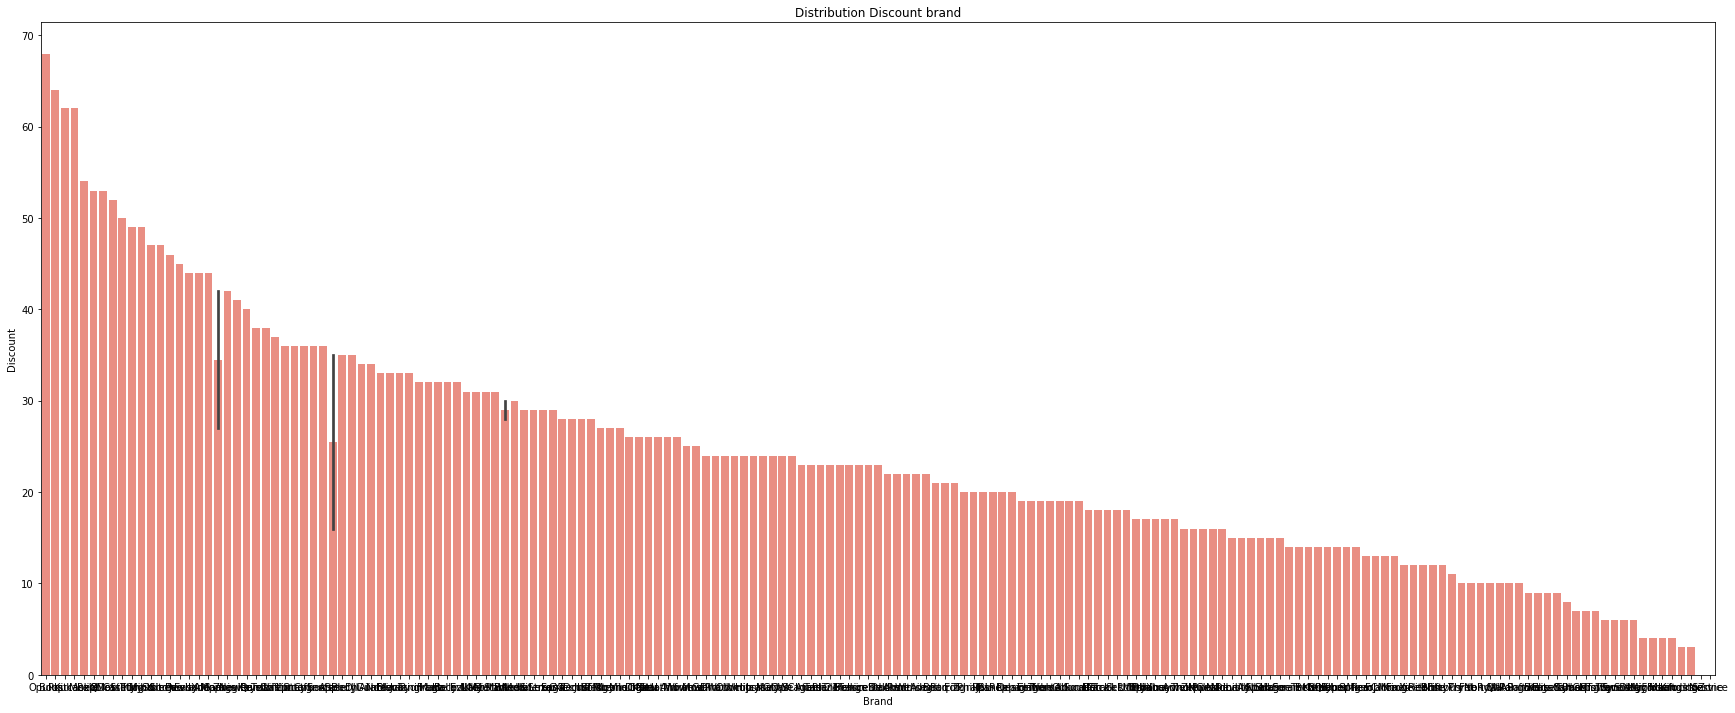

In [158]:

plt.subplots(figsize=(30, 12))

sns.barplot(data=b_p, x='long', y='discount', color='Salmon')
plt.xlabel('Brand')
plt.ylabel('Discount')
plt.title('Distribution Discount brand') 
plt.show() 

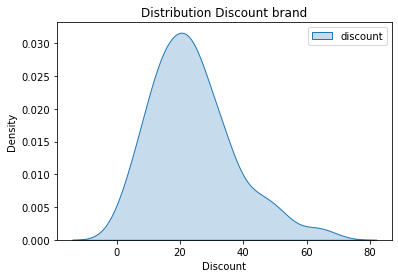

In [173]:
sns.kdeplot(data=b_p, shade=True)
plt.xlabel('Discount')
plt.ylabel('Density')
plt.title('Distribution Discount brand') 
plt.show() 

In [164]:
b_p_30=b_p.head(30)

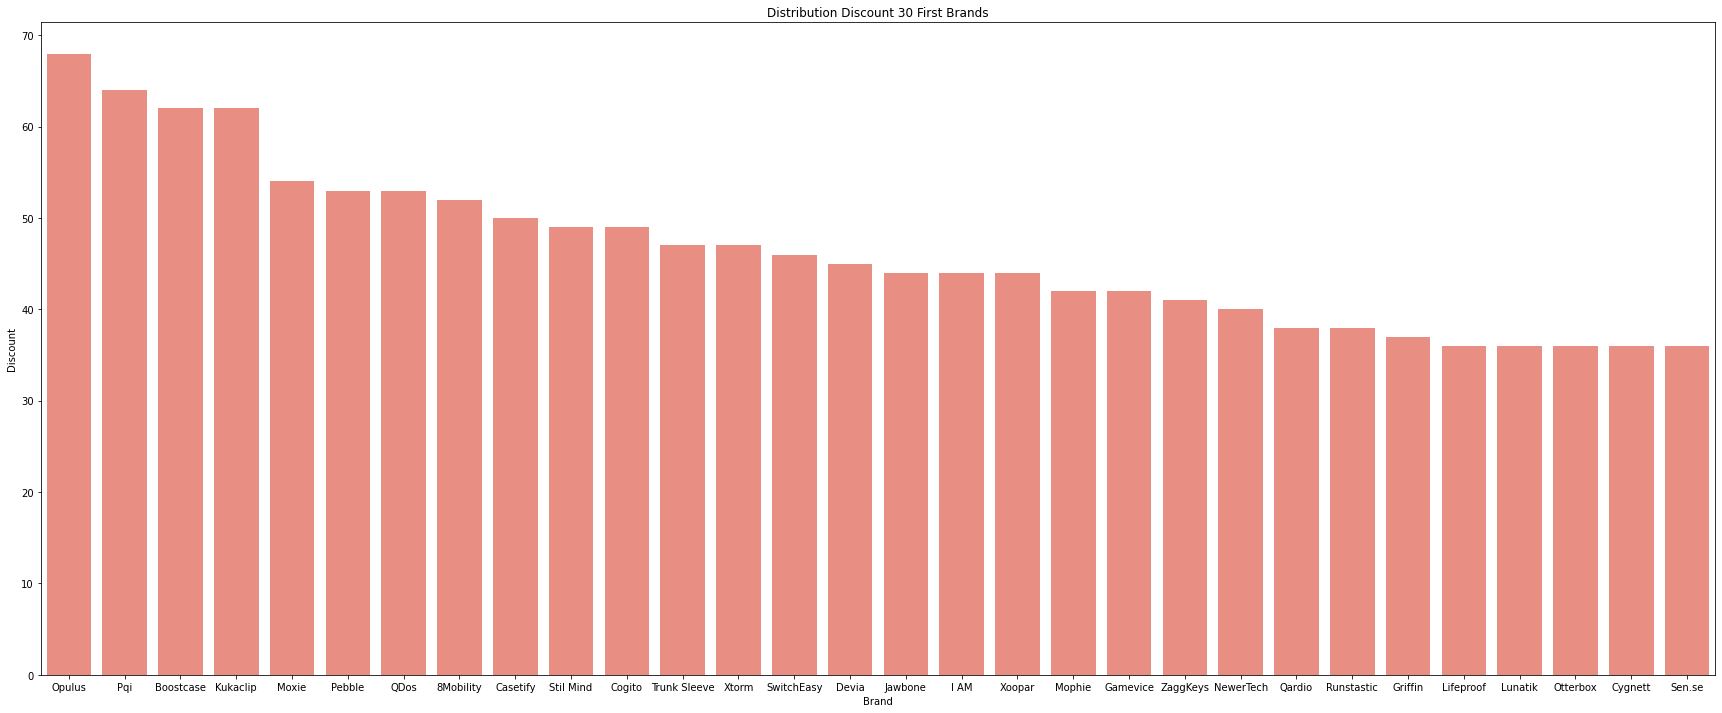

In [162]:
plt.subplots(figsize=(30, 12))

sns.barplot(data=b_p_30, x='long', y='discount', color='Salmon')
plt.xlabel('Brand')
plt.ylabel('Discount')
plt.title('Distribution Discount 30 First Brands') 
plt.show() 